In [20]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [22]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-06\data2\lev_06_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Item_Code', String),
        ('Total_Consumption_Quantity', String),
        ('Total_Consumption_Value', String),
        ('Source', String),
        ('Multiplier', Int64)])

In [23]:
cols = [
    'State',
    'Item_Code',
    'Total_Consumption_Quantity',
    'Total_Consumption_Value',
]

pdf = pdf [cols]


In [24]:

pdf = pdf.filter(
    pl.col('State') == '23'
)

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

'Desire Filter shape (193424, 4)'

In [25]:
print(f"Number of unique Item code present {pdf['Item_Code'].n_unique()}")

Number of unique Item code present 21


In [26]:
pdf.estimated_size(unit='mb')

1.4987678527832031

In [27]:
pdf.columns

['State', 'Item_Code', 'Total_Consumption_Quantity', 'Total_Consumption_Value']

In [28]:
pdf.estimated_size(unit='mb')

1.4987678527832031

In [29]:
df = pdf.to_pandas()

# Functions

In [30]:
def plot_graph(col: str, df: pd.DataFrame) -> None:
    # Create figure and axes with proper size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Bar plot
    sns.barplot(df[col], orient='h', ax=ax1)
    ax1.set_title(f"{col} Count")

    # KDE plot
    sns.kdeplot(df[col], ax=ax2)
    ax2.set_title(f"{col} Frequency")

    plt.tight_layout()
    plt.show()

In [34]:
def auto_label_and_plot(col_name: str, map_dictionary: dict):
    # Map the codes to labels
    df[col_name] = df['Item_Code'].map(map_dictionary)
    
    dataframe_name = f"{col_name}_df"
    # Group the data
    dataframe_name = df.groupby(col_name)[[
        'Total_Consumption_Quantity',
        'Total_Consumption_Value'
    ]].count()
    
    # Display summary
    display(dataframe_name.T)
    display(dataframe_name.describe().T)
    
    for col in dataframe_name.columns:
        plot_graph(col=col, df=dataframe_name)


$ Some lev 06 work

In [35]:
df['Item_Code'].unique()

array([283, 292,  13, 291, 293, 282,  15, 113, 296, 294, 290, 284, 280,
        14, 161, 295,  12, 281,  76, 289, 299], dtype=int16)

# Served Processed Food

served_food_category,cooked meals purchased,cooked meals purchased at subsidized rate,cooked meals received as assistance,cooked meals received free in workplace,cooked snacks purchased,other served processed food
Total_Consumption_Quantity,1258,68,2172,80,0,0
Total_Consumption_Value,1258,68,2172,80,25650,5536


,count,mean,std,min,25%,50%,75%,max
Total_Consumption_Quantity,6.0,596.333333,914.055943,0.0,17.0,74.0,963.5,2172.0
Total_Consumption_Value,6.0,5794.000000,9934.368143,68.0,374.5,1715.0,4695.0,25650.0


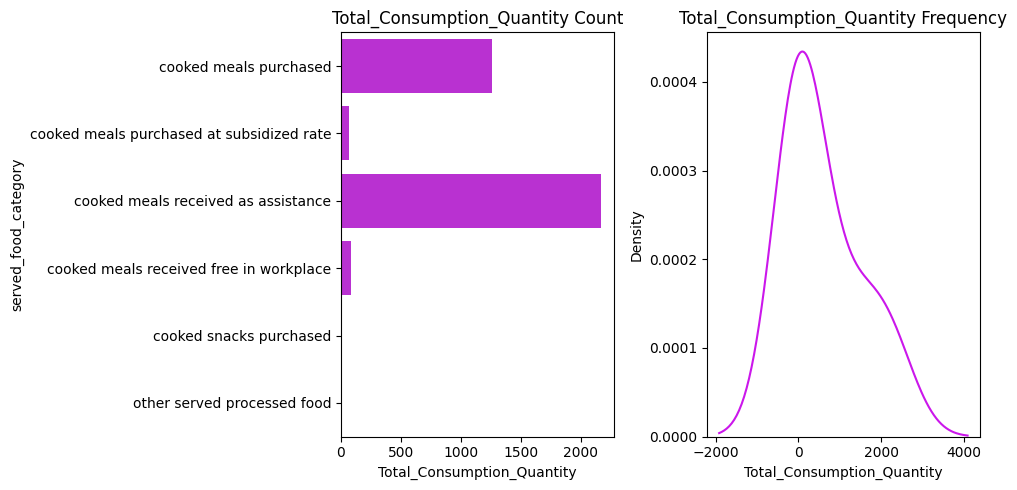

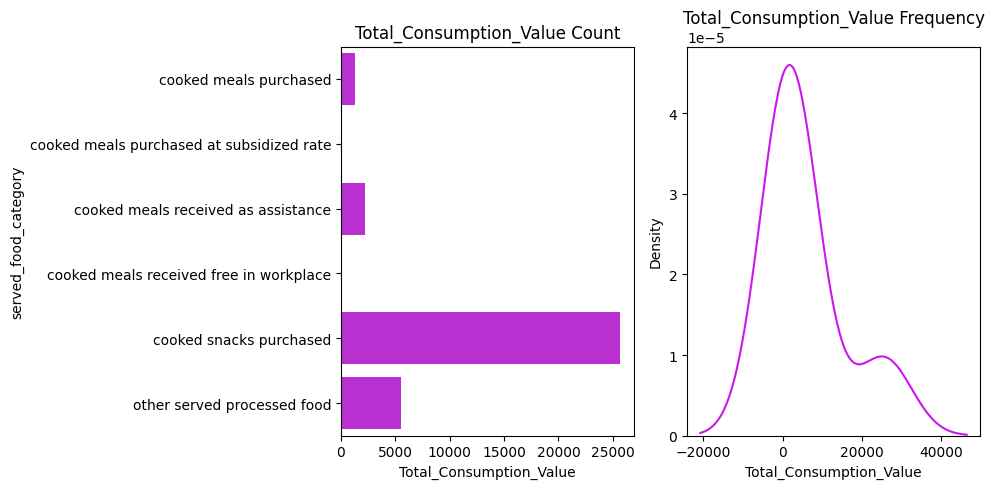

In [36]:
served_processed_mapping = {
    76: "cooked meals purchased at subsidized rate",
    280: "cooked meals purchased",
    281: "cooked meals received free in workplace",
    282: "cooked meals received as assistance",
    283: "cooked snacks purchased",
    284: "other served processed food",
    # 289: "served processed food: sub-total"
}

auto_label_and_plot(col_name='served_food_category', map_dictionary=served_processed_mapping)

# Packaged Processed Food

packaged_food_category,baby food,biscuits,bread (bakery),breakfast cereals,cake/pastry,chips/wafers/nachos,chocolates,health supplements,namkeen/papad/bhujia,noodles,other packaged processed food,pickles,sauce/jam/jelly/mayonnaise
Total_Consumption_Quantity,2,0,28,0,0,0,0,0,24,0,0,0,1748
Total_Consumption_Value,846,23614,9248,722,2842,15478,11032,2378,17872,5180,6122,7152,1748


,count,mean,std,min,25%,50%,75%,max
Total_Consumption_Quantity,13.0,138.615385,483.656479,0.0,0.0,0.0,2.0,1748.0
Total_Consumption_Value,13.0,8018.000000,7197.030175,722.0,2378.0,6122.0,11032.0,23614.0


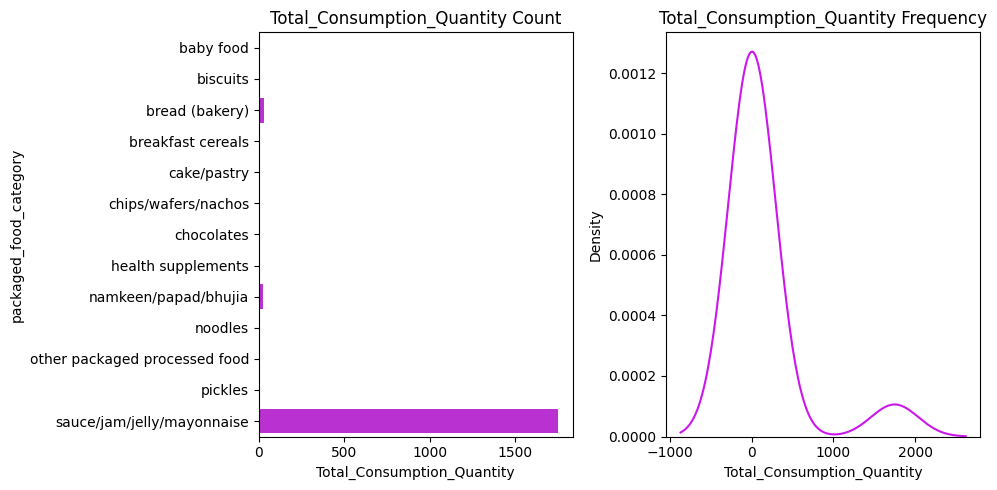

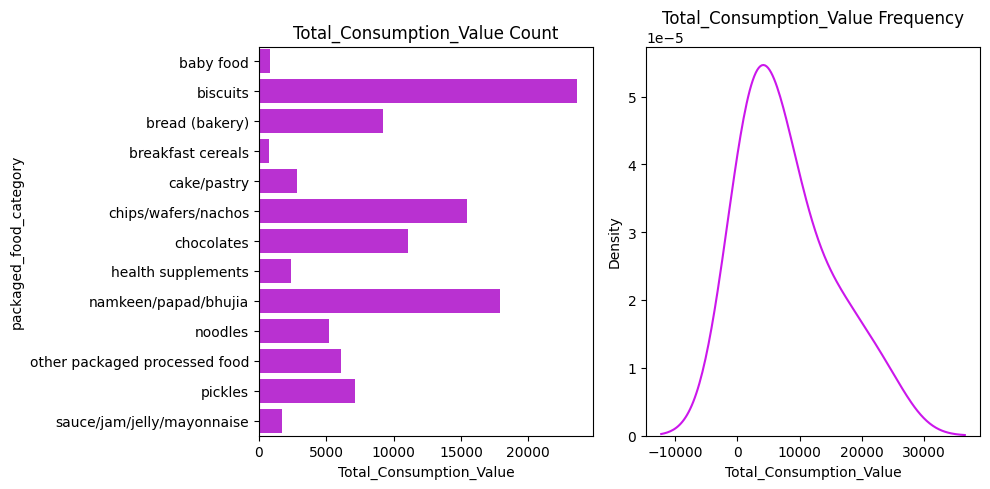

In [37]:
packaged_processed_mapping = {
    12: "breakfast cereals",
    13: "biscuits",
    14: "health supplements",
    15: "noodles",
    113: "bread (bakery)",
    161: "baby food",
    290: "cake/pastry",
    291: "chocolates",
    292: "namkeen/papad/bhujia",
    293: "chips/wafers/nachos",
    294: "pickles",
    295: "sauce/jam/jelly/mayonnaise",
    296: "other packaged processed food",
    # 299: "packaged processed food: sub-total"
}

auto_label_and_plot(col_name='packaged_food_category', map_dictionary=packaged_processed_mapping)

In [38]:
df.columns

Index(['State', 'Item_Code', 'Total_Consumption_Quantity',
       'Total_Consumption_Value', 'served_food_category',
       'packaged_food_category'],
      dtype='object')

In [39]:
# Done 🙌